In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])

In [4]:
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


Replace the values with class labels

In [5]:
iris.species = np.where(iris.species == 0.0, 'setosa', 
                        np.where(iris.species == 1.0,'versicolor', 'virginica'))

Remove spaces from column name

In [6]:
iris.columns = iris.columns.str.replace(' ','')
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The columns 'species' is categorical, so let's check the frequency distribution for each category.

In [7]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

<Figure size 1080x576 with 0 Axes>

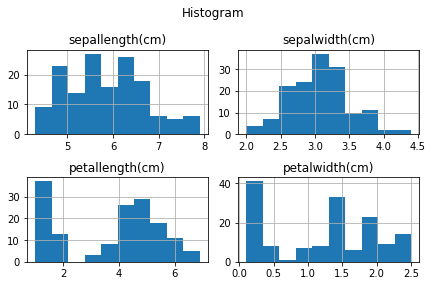

In [8]:
plt.figure(figsize=(15,8))
iris.hist()     
plt.suptitle("Histogram", fontsize = 12) 
plt.tight_layout(pad=1)
plt.show()

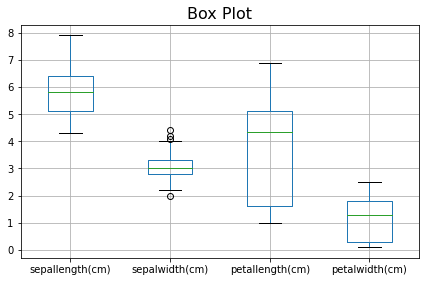

In [9]:
iris.boxplot()
plt.title("Box Plot", fontsize=16)
plt.tight_layout(pad=1)                                                                                                                    
plt.show()

## Multivariate Analysis

In multivariate analysis, you try to establish a sense of relationship of all variables with one other. 
Let’s determine the mean of each feature by species type

In [10]:
# print the mean for each column by species
iris.groupby(by = "species").mean()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


plot for mean of each feature for each label class

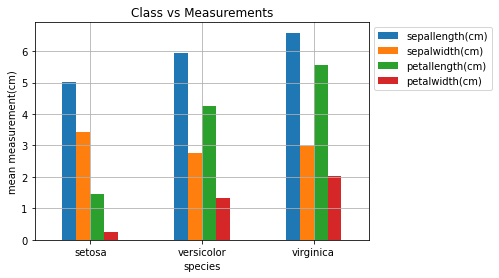

In [11]:
iris.groupby(by = "species").mean().plot(kind = "bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)  # manage the xticks rotation
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

#### Correlation Matrix

In [12]:
corr = iris.corr()
print(corr)

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.117570         0.871754   
sepalwidth(cm)         -0.117570        1.000000        -0.428440   
petallength(cm)         0.871754       -0.428440         1.000000   
petalwidth(cm)          0.817941       -0.366126         0.962865   

                 petalwidth(cm)  
sepallength(cm)        0.817941  
sepalwidth(cm)        -0.366126  
petallength(cm)        0.962865  
petalwidth(cm)         1.000000  


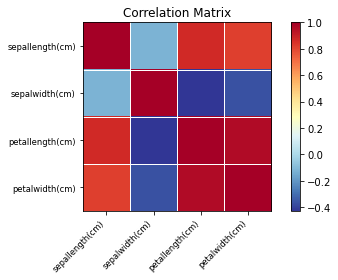

In [13]:
import statsmodels.api as sm

sm.graphics.plot_corr(corr, xnames=list(corr.columns))

plt.show()

#### Pair Plot

Text(0.5, 0.98, 'Pair Plot')

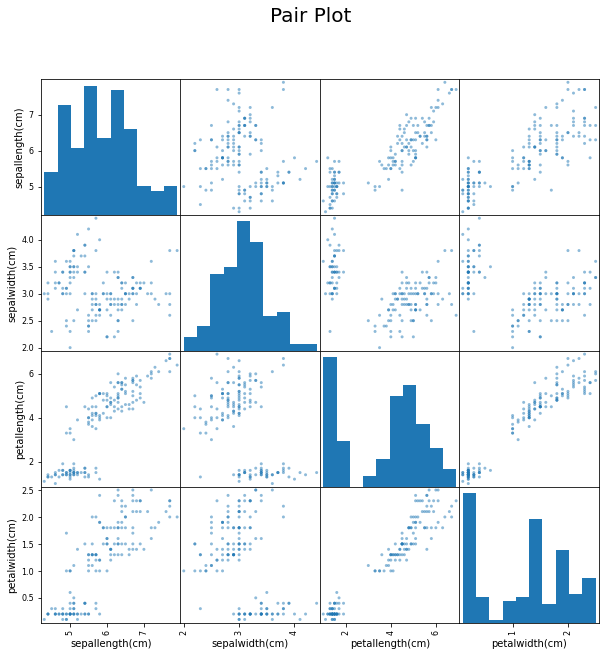

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, figsize = (10, 10))
plt.suptitle("Pair Plot", fontsize = 20)

#### Findings from EDA
There are no missing values.

Sepal is longer than a petal. Sepal length ranges between 4.3 and 7.9 with an average length of 5.8, whereas petal length ranges between 1 and 6.9 with an average length of 3.7.

Sepal is also wider than a petal. Sepal width ranges between 2 to 4.4 with an average width of 3.05, whereas petal width ranges between 0.1 to 2.5 with an average width of 1.19

Average petal length of Setosa is much smaller than Versicolor and Virginica; however, the average sepal width of Setosa is greater than Versicolor and Virginica

Petal length and width are strongly correlated, i.e., 96% of the time width increases with an increase in length.

Petal length has a negative correlation with sepal width, i.e., 42% of the time increase in sepal width will decrease petal length.

Initial conclusion from data: based on length and width of sepal/petal alone, you can conclude that Versicolor/Virginica might resemble each other in size’ however, Setosa characteristics seem to be noticeably different from the other two.

# Supervised Learning–Regression

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [30]:
df = sns.load_dataset('iris')

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
col=['petal_length','petal_width', 'species']

In [35]:
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [37]:
col = ['petal_length','petal_width']
X = df.loc[:,col]

species_to_num = {'setosa':0,
                 'versicolor': 1,
                 'virginica' :2}

df['tmp']= df['species'].map(species_to_num)
y = df['tmp']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: tmp, Length: 150, dtype: int64

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [17]:
iris = datasets.load_iris()

In [26]:
df = sns.load_dataset('iris')

NameError: name 'sns' is not defined

In [23]:
svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ))

In [24]:
svm_clf.fit(X_scaled, y)

NameError: name 'X_scaled' is not defined

In [25]:
svm_clf.predict([[5.5, 1.7]])

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.